In [45]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 14,
    "font.serif": ["Palatino"],
})

# Matrix rank 

Matrix rank: dimension of the column space $\equiv$ dimension of the row space

- We have not discussed yet, how to compute the matrix rank
- One (the most reliable but somewhat expensive) way to compute the matrix rank is to perform its SVD decomposition 
- Before we turn to this, lets play with the function matrix_rank from numpy

In [56]:
# A random matrix has full rank
import numpy as np
import numpy.linalg as la
n = 100
A = np.random.normal(size=(n,n))
la.matrix_rank(A)

100

# Lets create a rank-1 matrix 

In [59]:
u = np.random.normal(size=(n, 1))
A = u @ u.T
la.matrix_rank(A)

1

$A_{ij} = u_j u_j$

In [60]:
# Consider a small perturbation of A
delta_A = 1e-12*np.random.normal(size=(n,n))
Ap = A + delta_A

In [61]:
# upper left corner of A
A[:2,:2]

array([[ 0.40534717, -0.07139809],
       [-0.07139809,  0.0125761 ]])

In [62]:
# upper left corner of Ap
Ap[:2,:2]

array([[ 0.40534717, -0.07139809],
       [-0.07139809,  0.0125761 ]])

In [63]:
la.matrix_rank(Ap)

84

- Matrix rank is very sensitive to small perturbations of a matrix
- Dimensionality of a space, spanned by a set of vectors can be poorly defined
- Today we resolve this issue to come with a better understanding of related matrix properties

## What does it imply if we know that the matrix $A$ has low rank?

Consider generic $n\times n$ matrix $A = \bigg[a_1\bigg|a_2\bigg|...\bigg|a_n\bigg]$:
- It takes $\mathcal{O}(n^2)$ elements to store $A$
- It takes $\mathcal{O}(n^2)$ FLOPs to compute $u=Av$ for a given $v$

Consider rank-one matrix $A$
- It takes $\mathcal{O}(n)$ elements to store $A$. Indeed, all columns are collinear: 
it takes $n$ elements to store one column $a_1$ and $n-1$ elements to store the proportionality coefficients $b_i$ such that $$a_i = b_i a_1$$
As a result, the matrix is compressed:
$$
A_{ij} = a_i b_j\quad\textrm{or}\quad A=a^T b
$$
- It takes $\mathcal{O}(n)$ flops to compute $u=Av$ for a given $v$. Why?

# Low-rank approximation

In [65]:
u = np.random.normal(size=(n, 1))
A = u @ u.T
delta_A = 1e-10*np.random.normal(size=(n,n))
Ap = A + delta_A

In [66]:
# according to matrix_rank the rank of Ap is almost as high as it can be
la.matrix_rank(Ap)

100

In [67]:
# what error do we make if we replace Ap by a rank-1 matrix A?
print("absolute error:", np.linalg.norm(A - Ap))
print("relative error:", np.linalg.norm(A - Ap)/np.linalg.norm(A))

absolute error: 1.0158658489730158e-08
relative error: 1.2119290778015715e-10


- Thus, rank-1 matrix $A$ provides a very good approximation of a rank-100 matrix $Ap$
- It is a very synthetic example. Our goal today is to understand how this may work in a general case

# Geometric considerations 

- Consider an arbitrary $m\times n$ matrix $A$. It maps arbitrary $n$-dimensional vector $v$ to $m$-dimensional vector $u$: $u=Av$.
- Lets inspect the geometric meaning of this fact
![](geom.png)

## Singular value decomposition

Any $m\times n$ matrix $A$ can be written as a product of three matrices:  

$$ A = U \Sigma V^*, $$

where, for $K = \min(m, n)$:
- $U$ is an $m \times K$ matrix with orthonormal columns, 
- $V$ is an $n \times K$ matrix with orthonormal columns,
- $\Sigma$ is a diagonal matrix with non-negative elements on the diagonal 

Reduced SVD ($m\geq n$)
![](reduced.png)

Sometimes its convenient to append the missing columns, so that both matrices ($U$ and $V$) become unitary.

Full SVD ($m\geq n$)
![](full.png)

- We can write down $A$ element-wise: $$a_{ij} = \displaystyle{\sum_{\alpha=1}^r} \sigma_\alpha u_{i\alpha} v_{j\alpha}^{*}$$
- One usually enumerates diagonal elements of $\Sigma$ in a descending order $\sigma_1 \geq  \ldots, \geq \sigma_K$.
- If $\text{rank}(A) = r$, then: $\sigma_{r+1} = ... = \sigma_K = 0.$

Columns of matrices $U$ and $V$ are known as left and right singular vectors.
They form orthonormal sets in the space of image ($u_i$) and pre-image ($v_i$) of the matrix $A$. Their geometrical meaning:

$$\text{ker}(A) = \mathrm{span}\{v_{r+1},\dots,v_K\}$$

$$\text{im}(A) = \mathrm{span}\{u_{1},\dots,u_r\}$$

# Eckart-Young theorem

The best low-rank approximation can be computed by SVD.

Let $r < \text{rank}(A)$, $B$ is a matrix of rank $r$ (to be optimized). Then

$$ \min_{\text{rank}(B)=r} \|A - B\|_2 = \sigma_{r+1}. $$

## Low-rank approximation

The best rank-$r$ approximation to $A$ is obtained by setting $\sigma_{r+1}= 0, \ldots, \sigma_K = 0$:

$$A_r = U_r \Sigma_r V_r^*.$$

The error 

$$ \min_{\text{rank}(B)=r} \Vert A - B \Vert_2 =  \Vert A - A_r \Vert_2 = \sigma_{r+1}$$

Thus the faster the singular values decay, the better is accuracy of 'compression' of the matrix into low-rank form.

The same holds for Frobenius norm:
$$\min_{\text{rank}(B)=r}\Vert A - B \Vert_F =  \Vert A - A_r \Vert_F = \sqrt{\sigma_{r+1}^2 + \dots + \sigma_{K}^2}$$

## Computing SVD

- Algorithms for the computation of the SVD are tricky. Some approaches will be discussed later.

- We are ready to use NumPy and SciPy implementations

- Broadly speaking, one may think of (i) exact computation of complete SVD, (ii) exact computation of 'sparse' SVD,  where we need only first $k \ll n$ singular values and vectors and (iii) randomized SVD (approximate evaluation of the leading subset of singular values and vectors)

In [68]:
# Recall: Computing matrix rank
import numpy as np
print('Rank of the matrix:', np.linalg.matrix_rank(A))
print('Rank of the matrix:', np.linalg.matrix_rank(Ap))

Rank of the matrix: 1
Rank of the matrix: 100


In [69]:
A[:2,:2]

array([[ 0.62881492, -0.38142909],
       [-0.38142909,  0.2313688 ]])

In [70]:
Ap[:2,:2]

array([[ 0.62881492, -0.38142909],
       [-0.38142909,  0.2313688 ]])

In [74]:
u, s, vh = np.linalg.svd(A)
up, sp, vhp = np.linalg.svd(Ap)

In [ ]:
la.matrix_rank()

In [75]:
s[:10]

array([8.38222193e+01, 4.53158462e-14, 4.00097651e-14, 3.10833486e-14,
       2.59425086e-14, 2.13154110e-14, 2.07592143e-14, 1.90293475e-14,
       1.77971365e-14, 1.46656957e-14])

In [73]:
sp[:10]

array([8.38222193e+01, 1.99954677e-09, 1.89619187e-09, 1.86088354e-09,
       1.84812585e-09, 1.81777344e-09, 1.75761017e-09, 1.75596734e-09,
       1.68481081e-09, 1.66847435e-09])

SVD allows to properly define a numerical rank for a given tolerance $\epsilon$

## Singular values of a random Gaussian matrix

What is the singular value decay of a random matrix?

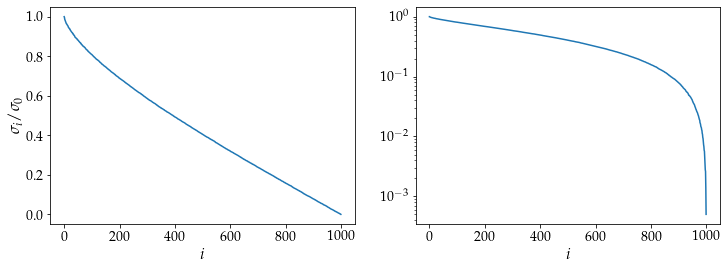

In [23]:
import numpy as np
import matplotlib.pyplot as plt
n = 1000
a = np.random.randn(n, n)
s = np.linalg.svd(a, compute_uv=False)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(s/s[0])
ax[1].plot(s/s[0])
ax[1].set_yscale('log')
ax[0].set_ylabel(r"$\sigma_i / \sigma_0$", fontsize=16)
ax[0].set_xlabel(r"$i$", fontsize=16)
ax[1].set_xlabel(r"$i$", fontsize=16);

# Applications of SVD

## Dense matrix compression

Dense matrices require $N^2$ elements to be stored. A rank-$r$ approximation can reduces this number of $\mathcal{O}(Nr)$. Let us consider image compression as an example.

In [76]:
from skimage import data
from skimage.color import rgb2gray
from numpy.linalg import svd
from skimage import img_as_float

In [77]:
cat = rgb2gray(img_as_float(data.chelsea()))

In [80]:
cat.shape

(300, 451)

In [78]:
cat[:5, :5]

array([[0.48523098, 0.48523098, 0.47738784, 0.47738784, 0.47738784],
       [0.49699569, 0.49307412, 0.48523098, 0.48130941, 0.48130941],
       [0.50849255, 0.50457098, 0.49475569, 0.49083412, 0.49307412],
       [0.52054   , 0.51269686, 0.50485373, 0.50485373, 0.50064941],
       [0.52894863, 0.52110549, 0.51661843, 0.51269686, 0.50849255]])

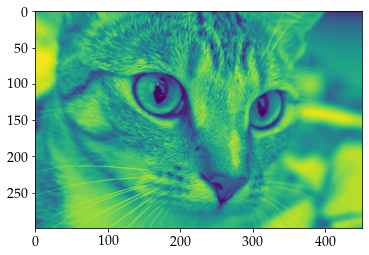

In [81]:
plt.imshow(cat)

In [83]:
U, s, Vc = svd(cat, full_matrices=False)

In [88]:
def compress_and_show(k):
    os = cat.shape
    cat_compressed = U[:,:k] @ np.diag(s[:k]) @ Vc[:k,:]
    compression_ratio = 100.0* (k*(os[0] + os[1])+k)/(os[0]*os[1])
    plt.title("compression ratio={:.2f}".format(compression_ratio)+"%")
    plt.imshow(cat_compressed)
    plt.axis('off')
    plt.tight_layout()

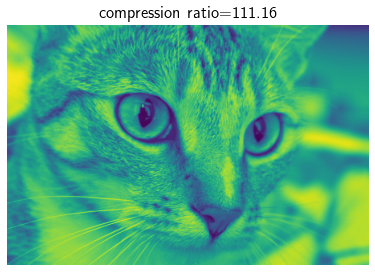

In [90]:
compress_and_show(200)

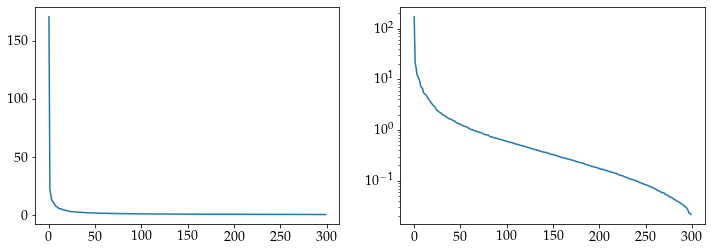

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(s)
ax[1].plot(s)
ax[1].set_yscale('log')

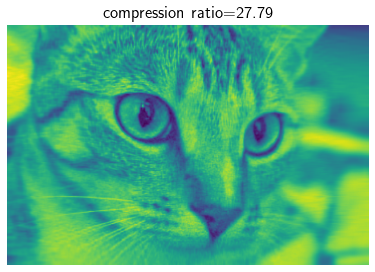

In [92]:
compress_and_show(50)

# Applications of SVD 

## Principal Component Analysis (PCA)

Consider a dataset of points.

![](https://i.stack.imgur.com/jPw90.png)

The two 'properties' of each point in the sample ($x$ and $y$ on this plot) are correlated. Let us think of some new 'property', given by a linear combination $w_1 x + w_2 y$. PCA looks for properties that show as much variation across the data points as possible. Equivalently, PCA looks for properties that allow to reconstruct the original characteristics as well as possible.

Consider projection of the data points onto a certain (single) direction. Where should one project to maintain the largest variety of the datapoint? Related question: whats the best linear fit?

![](https://i.stack.imgur.com/lNHqt.gif)

### Formally:
The first component should be defined in order to maximize variance. The projections of datapoints $\mathbf  {a}_{{(i)}}$ onto the vector ${\mathbf  {w}}$ are given by $\mathbf  {a}_{{(i)}}\cdot {\mathbf  {w}}$. Suppose we've already standardized the data, then we need to solve the following optimization problem:
$$
{\underset  {\Vert {\mathbf  {w}}\Vert =1}{\operatorname {\arg \,max}}}\,\left\{\sum _{i}\left({\mathbf  {a}}_{{(i)}}\cdot {\mathbf  {w}}\right)^{2}\right\}
$$

or, combining vectors $\mathbf  {a}_{{(i)}}$ into the rows of the matrix $\mathbf {A}$, we may write:

$$
{\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\{\Vert \mathbf {Aw} \Vert ^{2}\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\mathbf {w} ^{\top}\mathbf {A^{\top}} \mathbf {Aw} \right\}
$$

The key ingridient is the matrix $A^T A$, proportional to the empirical covariance matrix. It is known that for positive semidefinite matrix $A^\top A$ the solution is delivered by the eigenvector of $A^\top A$, corresponding to the largest eigenvalue. We can repeat this procedure and construct another direction, explaining as much variance in orthogonal directions. So, we can conclude, that the following linear operation ($n$ stays for the number of observation points and $d$ for the dimensions of observation vectors):

$$
\underset{n \times d}{A} \longrightarrow \underset{n \times k}{A^\prime} = \underset{n \times d}{A} \cdot \underset{d \times k}{W} 
$$

describes the projection of data onto the $k$ principal components, where $W$ contains first (by the size of eigenvalues) $k$ eigenvectors of $A^\top A$

Formally, we may start with SVD decomposition of $A$:

$$A = U \Sigma W^\top$$

Then, consider matrix $A^\top A$:

$$A^\top A=W \Sigma^2 W^\top$$

Which corresponds to the eigendecomposition of matrix $A^\top A$, where $W$ stands for the matrix of eigenvectors of $A^\top A$, while $\Sigma^2$ contains eigenvalues of $A^\top A$. In other words, columns of $W$ are right singular vectors of $A$.

In the end:
$$
A \longrightarrow A \cdot W = U \Sigma W^\top W = U \Sigma
$$



# Example of dimensionality reduction via PCA: Wine dataset

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [94]:
wine = load_wine()

A = wine['data']
print(wine['data'].shape, "\n")

labels = wine['target']
print(labels)

classes = [0, 1, 2]
colors = ['red', 'green', 'blue']

(178, 13) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [95]:
# data standardization
A_std = StandardScaler().fit_transform(A)

In [97]:
A_std[:10,:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254],
       [ 0.24628963, -0.49941338, -0.82799632],
       [ 0.19687903,  0.02123125,  1.10933436],
       [ 1.69154964, -0.34681064,  0.4879264 ],
       [ 0.29570023,  0.22769377,  1.84040254],
       [ 1.48155459, -0.51736664,  0.30515936],
       [ 1.71625494, -0.4186237 ,  0.30515936],
       [ 1.3086175 , -0.16727801,  0.89001391],
       [ 2.25977152, -0.62508622, -0.7183361 ],
       [ 1.0615645 , -0.88540853, -0.352802  ]])

How can we visually inspect the dataset? Recall that we have 178 datapoints in 13-dimensional space. What if we reduce dimension in some random way? Lets pick two random features.

In [98]:
rank = 2
ix = np.random.choice(A.shape[1], 2, replace=False)
print(ix)

[0 3]


In [99]:
def inspect_projections(projections):
    for label, colour in zip(classes, colors):
        plt.scatter(projections[labels == label, 0],
                    projections[labels == label, 1],
                    label = label,
                    c = colour)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [100]:
rnd_projections = A[:, ix]

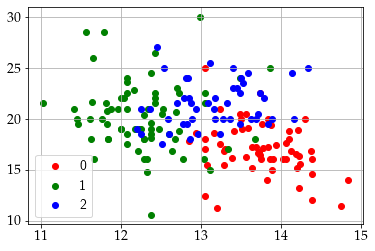

In [102]:
inspect_projections(rnd_projections)

## Lets use PCA for (unsupervised) projection 

In [103]:
u, s, wh = np.linalg.svd(A_std)

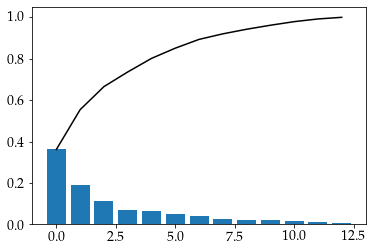

In [115]:
cum_s = np.cumsum(s**2)
plt.plot(cum_s/cum_s[-1], color = 'black')
plt.bar(x=np.arange(len(s)), height=s**2/cum_s[-1]);

Lets project onto the principal components: $A \longrightarrow  U \Sigma$

In [110]:
projections = u[:,:rank] @ np.diag(s[:rank])

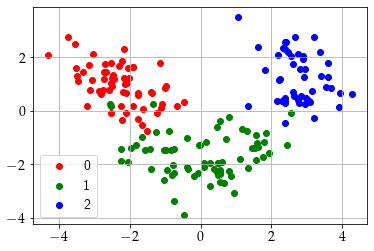

In [111]:
inspect_projections(projections)

Its clear that projections obtained by SVD capture the data variety much better than just two random columns. The resulting projections can be fed to your favourite classification algorithm. In this case, we reduced (in an unsupervised manner) the data in 13-dimensional space to the data in 2-dimensional space!